<a href="https://colab.research.google.com/github/WanQi-K/DataSciencePortfolio/blob/main/Which_Show_Suits_Me%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
!pip install kaggle_api_extended

import os
os.environ['KAGGLE_USERNAME'] = "WanQi83"
os.environ['KAGGLE_KEY'] = "your_kaggle_api_key"

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney', path='./', unzip=True)

api.dataset_download_files('rahulvyasm/netflix-movies-and-tv-shows', path='./', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney
Dataset URL: https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows


In [93]:
import pandas as pd

shows_data = pd.read_csv('tv_shows.csv')
shows_data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [94]:
shows_data.columns=shows_data.columns.str.lower()

In [95]:
details_data = pd.read_csv('netflix_titles.csv', encoding='latin1')

#Drop empty columns
details_data=details_data.loc[:, ~details_data.columns.str.contains('Unnamed')]
details_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [96]:
breaking_bad_rows=details_data[details_data['title']=="Breaking Bad"]
breaking_bad_rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5940,s5941,TV Show,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,"August 2, 2013",2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...


In [97]:
#Merge listed_in from details_data to shows_data based on title
details_subset = details_data[['title', 'listed_in','rating','duration']]
merged_data = pd.merge(shows_data, details_subset, on='title', how='left')
merged_data.head()

,unnamed: 0,id,title,year,age,imdb,rotten tomatoes,netflix,hulu,prime video,disney+,type,listed_in,rating,duration
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1,"Crime TV Shows, TV Dramas, TV Thrillers",TV-MA,5 Seasons
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy",TV-14,3 Seasons
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1,"Anime Series, International TV Shows",TV-MA,1 Season
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1,"Crime TV Shows, TV Comedies, TV Dramas",TV-MA,4 Seasons
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1,"Crime TV Shows, International TV Shows, TV Dramas",TV-MA,3 Seasons


In [98]:
merged_data.drop(['unnamed: 0','id'],axis=1,inplace=True)
merged_data.dropna(axis=0,inplace=True)

In [99]:
merged_data.head()

,title,year,age,imdb,rotten tomatoes,netflix,hulu,prime video,disney+,type,listed_in,rating,duration
0,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1,"Crime TV Shows, TV Dramas, TV Thrillers",TV-MA,5 Seasons
1,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy",TV-14,3 Seasons
2,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1,"Anime Series, International TV Shows",TV-MA,1 Season
3,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1,"Crime TV Shows, TV Comedies, TV Dramas",TV-MA,4 Seasons
4,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1,"Crime TV Shows, International TV Shows, TV Dramas",TV-MA,3 Seasons


In [100]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1194 entries, 0 to 5303
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            1194 non-null   object
 1   year             1194 non-null   int64 
 2   age              1194 non-null   object
 3   imdb             1194 non-null   object
 4   rotten tomatoes  1194 non-null   object
 5   netflix          1194 non-null   int64 
 6   hulu             1194 non-null   int64 
 7   prime video      1194 non-null   int64 
 8   disney+          1194 non-null   int64 
 9   type             1194 non-null   int64 
 10  listed_in        1194 non-null   object
 11  rating           1194 non-null   object
 12  duration         1194 non-null   object
dtypes: int64(6), object(7)
memory usage: 130.6+ KB


# Data Processing

In [101]:
merged_data.rating.value_counts()

,count
rating,
TV-MA,584
TV-14,281
TV-PG,105
TV-Y7,86
TV-Y,82
TV-G,37
R,7
PG,7
PG-13,5


In [102]:
import pandas as pd

# Define category mapping
category_map = {
    'TV-Y': 'Kids',
    'TV-G': 'Kids',
    'TV-Y7': 'Kids',
    'TV-Y7-FV': 'Kids',
    'G': 'Kids',

    'TV-PG': 'Teens',
    'PG': 'Teens',
    'TV-14': 'Teens',
    'PG-13': 'Teens',

    'TV-MA': 'Adults',
    'R': 'Adults',
    'NC-17': 'Adults',
    'NR': 'Adults',
    'UR': 'Adults'
}

# Apply mapping to create a new 'category' column
merged_data['audience_category']=merged_data['rating'].map(category_map)

merged_data.drop(['age','rating'],axis=1,inplace=True)

In [103]:
#Replace /10 in imdb
merged_data['imdb'] = merged_data['imdb'].str.replace('/10', '', regex=False)
merged_data['imdb'] = pd.to_numeric(merged_data['imdb'])

merged_data['rotten tomatoes'] = merged_data['rotten tomatoes'].str.replace('/100', '', regex=False)
merged_data['rotten tomatoes'] = pd.to_numeric(merged_data['rotten tomatoes'])

#Drop rows containing min / seasons in duration
merged_data = merged_data[~merged_data['duration'].str.contains('min', case=False, na=False)]
merged_data['number of season'] = merged_data['duration'].str.replace(r'(Seasons|Season)\s*', '', regex=True).astype(int)
merged_data.drop('duration', axis=1, inplace=True)

#Drop type
merged_data.drop('type', axis=1, inplace=True)

<ipython-input-103-5a0a00a8c5a0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['number of season'] = merged_data['duration'].str.replace(r'(Seasons|Season)\s*', '', regex=True).astype(int)


In [104]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 5237
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1149 non-null   object 
 1   year               1149 non-null   int64  
 2   imdb               1149 non-null   float64
 3   rotten tomatoes    1149 non-null   int64  
 4   netflix            1149 non-null   int64  
 5   hulu               1149 non-null   int64  
 6   prime video        1149 non-null   int64  
 7   disney+            1149 non-null   int64  
 8   listed_in          1149 non-null   object 
 9   audience_category  1149 non-null   object 
 10  number of season   1149 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 107.7+ KB


In [105]:
merged_data.head()

,title,year,imdb,rotten tomatoes,netflix,hulu,prime video,disney+,listed_in,audience_category,number of season
0,Breaking Bad,2008,9.4,100,1,0,0,0,"Crime TV Shows, TV Dramas, TV Thrillers",Adults,5
1,Stranger Things,2016,8.7,96,1,0,0,0,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy",Teens,3
2,Attack on Titan,2013,9.0,95,1,1,0,0,"Anime Series, International TV Shows",Adults,1
3,Better Call Saul,2015,8.8,94,1,0,0,0,"Crime TV Shows, TV Comedies, TV Dramas",Adults,4
4,Dark,2017,8.8,93,1,0,0,0,"Crime TV Shows, International TV Shows, TV Dramas",Adults,3


In [106]:
merged_data.listed_in.value_counts()

,count
listed_in,
Kids' TV,99
TV Comedies,54
"Anime Series, International TV Shows",53
Reality TV,48
"Kids' TV, TV Comedies",47
...,...
"TV Sci-Fi & Fantasy, TV Thrillers",1
"TV Comedies, TV Mysteries",1
"Anime Series, Crime TV Shows, TV Horror",1


In [107]:
broad_categories = {
    "Kids & Family": ["Kids' TV", "Family"],
    "Comedy": ["TV Comedies", "Stand-Up Comedy & Talk Shows"],
    "Drama": ["TV Dramas", "Teen TV Shows"],
    "Action & Adventure": ["TV Action & Adventure", "TV Thrillers"],
    "Crime & Mystery": ["Crime TV Shows", "TV Mysteries", "TV Thrillers"],
    "Romance": ["Romantic TV Shows"],
    "Horror & Sci-Fi": ["TV Horror", "TV Sci-Fi & Fantasy"],
    "Reality & Docuseries": ["Reality TV", "Docuseries", "Science & Nature TV"],
    "International": ["International TV Shows", "Spanish-Language TV Shows", "Korean TV Shows"],
    "Classic & Cult": ["Classic & Cult TV"]
}

def categorize_genre(genres):
    genres_list = genres.split(", ")
    for category, subgenres in broad_categories.items():
        if any(genre in subgenres for genre in genres_list):
            return category
    return "Other"

merged_data["Broad_Category"] = merged_data["listed_in"].apply(categorize_genre)

In [108]:
merged_data

,title,year,imdb,rotten tomatoes,netflix,hulu,prime video,disney+,listed_in,audience_category,number of season,Broad_Category
0,Breaking Bad,2008,9.4,100,1,0,0,0,"Crime TV Shows, TV Dramas, TV Thrillers",Adults,5,Drama
1,Stranger Things,2016,8.7,96,1,0,0,0,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy",Teens,3,Crime & Mystery
2,Attack on Titan,2013,9.0,95,1,1,0,0,"Anime Series, International TV Shows",Adults,1,International
3,Better Call Saul,2015,8.8,94,1,0,0,0,"Crime TV Shows, TV Comedies, TV Dramas",Adults,4,Comedy
4,Dark,2017,8.8,93,1,0,0,0,"Crime TV Shows, International TV Shows, TV Dramas",Adults,3,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
5070,One Strange Rock,2018,8.8,74,0,0,0,1,"Docuseries, Science & Nature TV",Teens,1,Reality & Docuseries
5122,Liv and Maddie,2013,6.4,59,0,0,0,1,"Kids' TV, TV Comedies",Kids,4,Kids & Family
5131,Brain Games,2011,8.3,58,0,0,0,1,"Docuseries, Science & Nature TV",Kids,3,Reality & Docuseries
5159,Iron Man: Armored Adventures,2009,6.5,54,0,0,0,1,Kids' TV,Kids,2,Kids & Family


In [109]:

broad_category_map = {
    # Action & Thriller (Merging Thrillers, Action, and Classic Cult TV)
    "TV Thrillers": "Action & Thriller",
    "TV Action & Adventure": "Action & Thriller",
    "Classic & Cult TV": "Action & Thriller",

    # Drama (Merging Crime, Mysteries, British & Korean TV Shows, and International TV Shows)
    "Crime TV Shows": "Drama",
    "TV Dramas": "Drama",
    "TV Mysteries": "Drama",
    "British TV Shows": "Drama",
    "Korean TV Shows": "Drama",
    "International TV Shows": "Drama",

    # Comedy (Keeping it broad and including Stand-Up Comedy)
    "TV Comedies": "Comedy",
    "Stand-Up Comedy & Talk Shows": "Comedy",

    # Sci-Fi & Fantasy (Including Horror, Teen TV Shows, and Spanish-Language TV)
    "TV Sci-Fi & Fantasy": "Sci-Fi & Fantasy",
    "TV Horror": "Sci-Fi & Fantasy",
    "Teen TV Shows": "Sci-Fi & Fantasy",
    "Spanish-Language TV Shows": "Sci-Fi & Fantasy",

    # Documentary (Includes Reality TV, Science & Nature TV)
    "TV Documentaries": "Documentary",
    "Docuseries": "Documentary",
    "TV Reality": "Documentary",
    "Reality TV": "Documentary",
    "Science & Nature TV": "Documentary",

    # Kids & Animation (Includes Kids TV and Anime)
    "Kids' TV": "Kids & Animation",
    "Anime Series": "Kids & Animation",

    # Romance (Standalone)
    "Romantic TV Shows": "Romance",

    # International TV (Standalone for multilingual content)
    "International TV Shows": "International TV",
    "Korean TV Shows": "International TV",
    "Spanish-Language TV Shows": "International TV",
    "British TV Shows": "International TV"
}

# Function to map genres to broad categories
def map_to_broad_category(genre_list):
    broad_categories = set()
    for genre in genre_list:
        if genre in broad_category_map:
            broad_categories.add(broad_category_map[genre])
        else:
            broad_categories.add(genre)  # Keep other genres
    return list(broad_categories)


merged_data["listed_in"] = merged_data["listed_in"].str.split(", ")
merged_data["broad_categories"] = merged_data["listed_in"].apply(map_to_broad_category)


merged_data_exploded = merged_data.explode("broad_categories")


genre_one_hot = pd.get_dummies(merged_data_exploded["broad_categories"], prefix="Genre")


merged_data_final = merged_data.drop(columns=["listed_in", "broad_categories"]).join(
    genre_one_hot.groupby(merged_data_exploded.index).sum()
)

In [110]:
merged_data_final.drop(['Broad_Category'],axis=1,inplace=True)
merged_data_final.rename(columns={'prime video': 'primevideo'}, inplace=True)

In [111]:
merged_data_final.sort_values(by='title', inplace=True)
merged_data_final.reset_index(drop=True, inplace=True)

In [112]:
# Capitalize the title
merged_data_final['title'] = merged_data_final['title'].str.title()

In [113]:
pd.set_option('display.max_columns', None)
merged_data_final.head()

# pd.set_option('display.max_columns', 20)
# pd.set_option('display.max_rows', 50)

,title,year,imdb,rotten tomatoes,netflix,hulu,primevideo,disney+,audience_category,number of season,Genre_Action & Thriller,Genre_Comedy,Genre_Documentary,Genre_Drama,Genre_International TV,Genre_Kids & Animation,Genre_Romance,Genre_Sci-Fi & Fantasy
0,#Blackaf,2020,6.8,54,1,0,0,0,Adults,1,0,1,0,0,0,0,0,0
1,(Un)Well,2020,6.4,50,1,0,0,0,Adults,1,0,0,1,0,0,0,0,0
2,100 Days My Prince,2018,7.7,55,1,0,0,0,Teens,1,0,0,0,1,1,0,1,0
3,13 Reasons Why,2017,7.6,79,1,0,0,0,Adults,4,0,0,0,1,0,0,0,0
4,13 Reasons Why: Beyond The Reasons,2017,6.4,42,1,0,0,0,Adults,3,0,0,1,1,0,0,0,0


# EDA

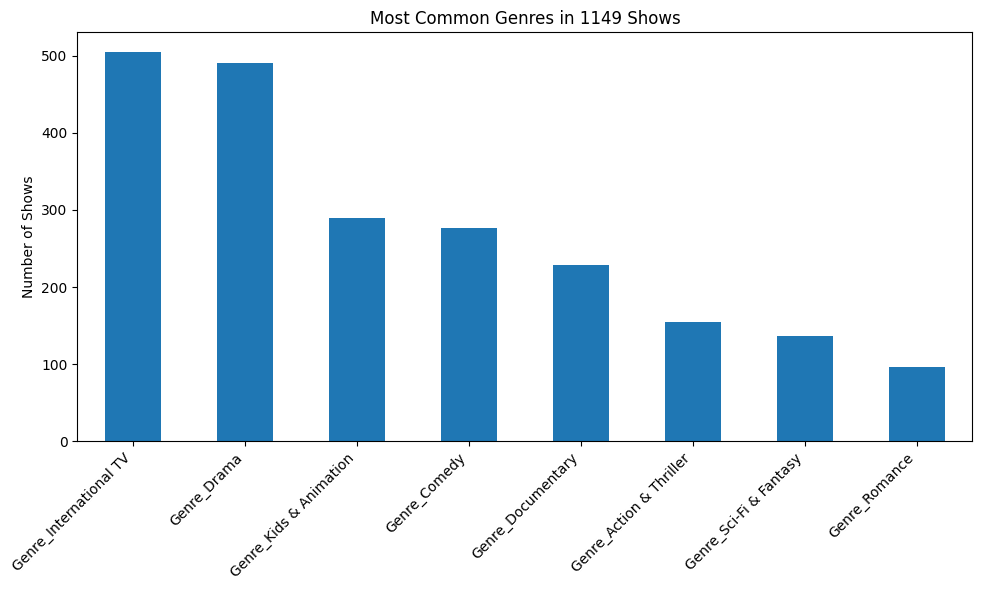

In [114]:
import matplotlib.pyplot as plt

# 1. Top Genres
genre_cols = [col for col in merged_data_final.columns if "Genre_" in col]
genre_counts = merged_data_final[genre_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title("Most Common Genres in 1149 Shows")
plt.ylabel("Number of Shows")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

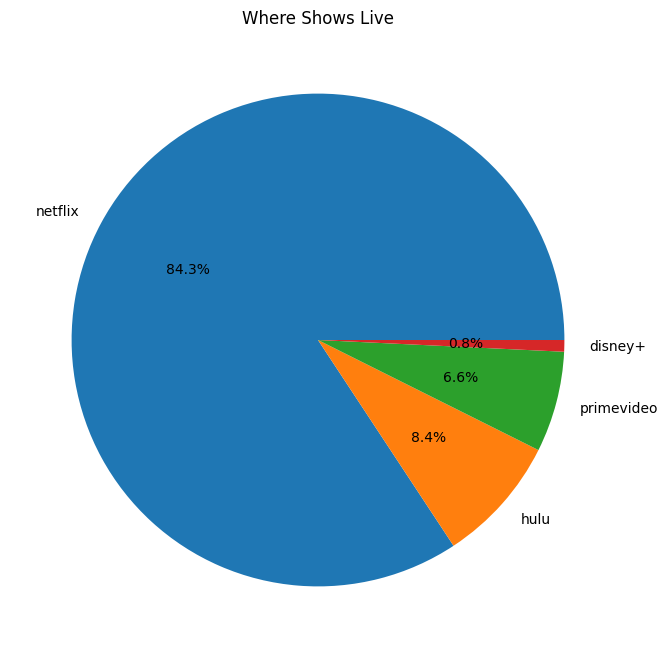

In [115]:
platforms = ["netflix", "hulu", "primevideo", "disney+"]
platform_counts = merged_data_final[platforms].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
platform_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Where Shows Live")
plt.ylabel("")
plt.show()

In [116]:
# 3. Quality by genre
genre_cols = [col for col in merged_data_final.columns if "Genre_" in col]
genre_quality = {genre: merged_data_final[merged_data_final[genre] == 1]["imdb"].mean() for genre in genre_cols}
genre_quality_df = pd.DataFrame(list(genre_quality.items()), columns=['Genre', 'Average IMDb'])

genre_quality_df['Genre'] = genre_quality_df['Genre'].str.replace('Genre_', '', regex=False)
genre_quality_df = genre_quality_df.sort_values(by='Average IMDb', ascending=False)

genre_quality_df.reset_index(drop=True, inplace=True)
genre_quality_df

,Genre,Average IMDb
0,Action & Thriller,7.401290
1,Drama,7.305906
2,Romance,7.282292
3,International TV,7.229505
4,Sci-Fi & Fantasy,7.101460
5,Documentary,7.086404
6,Comedy,7.081884
7,Kids & Animation,7.002768


# Data Model

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Set a target variable
merged_data_final["worth_it"] = (merged_data_final["imdb"] >= 7.5).astype(int)


features = ["rotten tomatoes", "number of season"] + [col for col in merged_data_final.columns if "Genre_" in col]
X = merged_data_final[features]
y = merged_data_final["worth_it"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7304347826086957


In [119]:
import ipywidgets as widgets
from IPython.display import display, HTML
from sklearn.metrics import accuracy_score

all_genres = [col.replace("Genre_", "") for col in merged_data_final.columns if "Genre_" in col]
genre_dropdown = widgets.SelectMultiple(
    options=all_genres,
    value=[],
    description='Genres:',
    disabled=False,
    rows=8,
    layout={'width': '350px'},
    description_width='150px'
)

all_titles = merged_data_final['title'].unique().tolist()
title_dropdown = widgets.Dropdown(
    options=all_titles,
    value=all_titles[0],
    description='Select Show:',
    layout={'width': '350px'},
    description_width='150px'
)


features = ["rotten tomatoes", "number of season"] + [col for col in merged_data_final.columns if "Genre_" in col]
X = merged_data_final[features]


def predict_and_display(title, selected_genres):
    show = merged_data_final[merged_data_final["title"] == title].iloc[0]
    show_features = [show["rotten tomatoes"], show["number of season"]] + [show[col] for col in merged_data_final.columns if "Genre_" in col]

    genre_cols = [col for col in merged_data_final.columns if "Genre_" in col]
    matching_genres = [g for g in selected_genres if show[f"Genre_{g}"] == 1]
    extra_genres = [col.replace("Genre_", "") for col in genre_cols if show[col] == 1 and col.replace("Genre_", "") not in selected_genres]
    genre_match_ratio = len(matching_genres) / max(len(selected_genres), 1) if selected_genres else 0
    genre_penalty = 0.02 * len(extra_genres)

    base_prob = model.predict_proba([show_features])[0][1]
    if selected_genres:
        worth_it_score = max(0, (0.5 * genre_match_ratio + 0.5 * base_prob) - genre_penalty)
        intro = ""
    else:
        worth_it_score = base_prob
        intro = "<p>No genres selected—here’s a general prediction:</p>"

    platforms = [p for p in ["Netflix", "Hulu", "Prime Video", "Disney+"] if show[p.lower().replace(" ", "")] == 1]

    html = f"""
    <h3>{title}</h3>
    {intro}
    <p><b>Worth Watching for You:</b> {worth_it_score*100:.1f}%</p>
    <p><b>Seasons:</b> {show['number of season']}</p>
    <p><b>Available on:</b> {', '.join(platforms)}</p>
    """
    if matching_genres:
        html += f"<p><b>Matches your taste:</b> {', '.join(matching_genres)}</p>"
    if extra_genres and selected_genres:
        html += f"<p><b>Other genres:</b> {', '.join(extra_genres)}</p>"

    display(HTML(html))


suggest_button = widgets.Button(
    description="Suggest Top Picks",
    layout={'width': '200px'}
)
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        selected_genres = genre_dropdown.value
        merged_data_final["base_prob"] = model.predict_proba(X)[:, 1]

        genre_cols = [col for col in merged_data_final.columns if "Genre_" in col]

        def calc_personal_score(row):
            matching_genres = [g for g in selected_genres if row[f"Genre_{g}"] == 1]
            extra_genres = [col.replace("Genre_", "") for col in genre_cols if row[col] == 1 and col.replace("Genre_", "") not in selected_genres]
            genre_match_ratio = len(matching_genres) / max(len(selected_genres), 1) if selected_genres else 0
            genre_penalty = 0.02 * len(extra_genres)
            return max(0, (0.5 * genre_match_ratio + 0.5 * row["base_prob"]) - genre_penalty)

        merged_data_final["personal_score"] = merged_data_final.apply(calc_personal_score, axis=1)

        html = "<h3>Top 3 Picks for Your Genres:</h3>"
        if selected_genres:
            genre_cols = [f"Genre_{g}" for g in selected_genres]
            matches = merged_data_final[merged_data_final[genre_cols].eq(1).any(axis=1)]
        else:
            matches = merged_data_final

        top_3 = matches.sort_values("personal_score", ascending=False).head(3)
        if top_3.empty:
            html += "<p>No exact matches—here are top-rated shows:</p>"
            top_3 = merged_data_final.sort_values("personal_score", ascending=False).head(3)

        for i, row in top_3.iterrows():
            platforms = [p for p in ["Netflix", "Hulu", "Prime Video", "Disney+"] if row[p.lower().replace(" ", "")] == 1]
            matching_genres = [g for g in selected_genres if row[f"Genre_{g}"] == 1]
            extra_genres = [col.replace("Genre_", "") for col in genre_cols if row[col] == 1 and col.replace("Genre_", "") not in selected_genres]
            html += f"<p><b>{row['title']}:</b> {row['personal_score']*100:.1f}%"
            if matching_genres:
                html += f" (Matches: {', '.join(matching_genres)})"
            if extra_genres and selected_genres:
                html += f" (Extras: {', '.join(extra_genres)})"
            html += f", {row['number of season']} seasons, on {', '.join(platforms)}</p>"

        display(HTML(html))

suggest_button.on_click(on_button_clicked)

display(HTML("<h2>Find Your Next Binge!</h2><p>Pick your genres and a show—or get top picks. Built with 1149 shows and ML.</p>"))
interactive_widget = widgets.interactive(predict_and_display, title=title_dropdown, selected_genres=genre_dropdown)
display(widgets.VBox([interactive_widget, suggest_button, output]))
print(f"Model accuracy on test data: {accuracy_score(y_test, model.predict(X_test)):.2f}")

Model accuracy on test data: 0.73
